In [1]:
%matplotlib inline
from vis_common import *

In [2]:
species = f['species'].cat.categories
drac_species = [sp for sp in species if 'draconian' in sp]
idrac = f['species'].isin(drac_species)

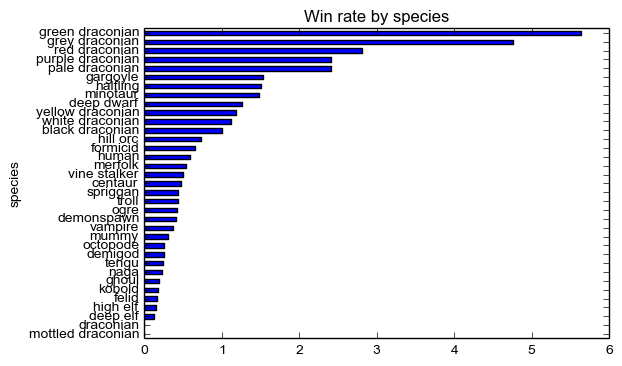

In [3]:
# This is the naive way of doing it. But we get a 0% win rate for baby draconians
# (since it's basically impossible to win the game before level 7), and an artificially
# high win rate for coloured draconians, because of the survivor bias. See below for better solution.
plot_winrate(f, 'species')

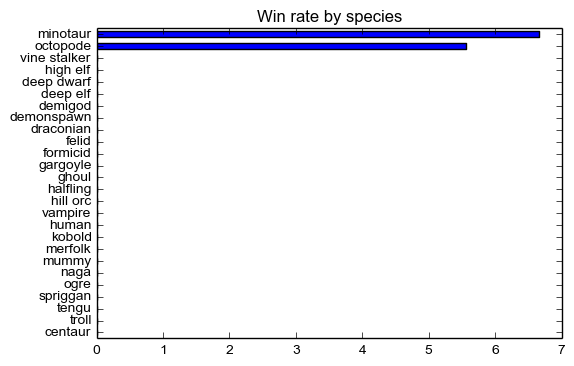

In [7]:
def original_species(i):
    sp = f['species'][i]
    if 'draconian' in sp:
        return 'draconian'
    else:
        return sp
    
(f.head(500).groupby(original_species)['won'].mean().dropna() * 100).sort_values()\
    .plot.barh(title='Win rate by species (%)');

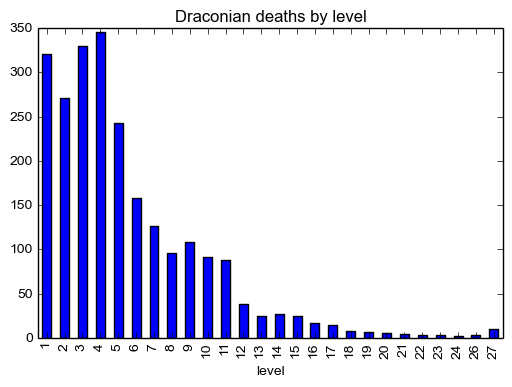

In [8]:
death_lvls = f[ilost & idrac].groupby('level').size()
death_lvls.plot.bar(title='Draconian deaths by level');
# No peak at lvl 7. Guess players really aren't scumming drac colours.
# TODO: Some day I'll understand matplotlib primitives well enough to do stuff like putting plots
# next to each other.

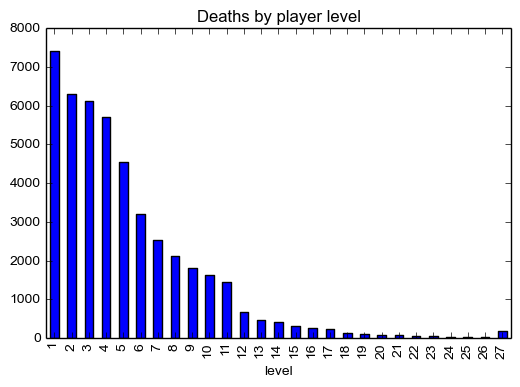

In [9]:
f[ilost].groupby('level').size().plot.bar(title='Deaths by player level');

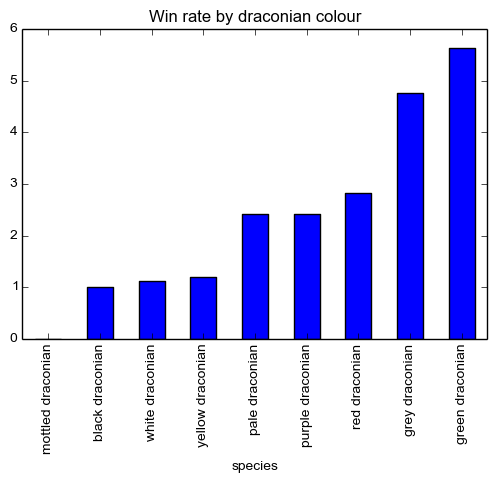

In [10]:
colored_dracs = [sp for sp in drac_species if sp != 'draconian']
cdrac_index = f['species'].isin(colored_dracs)
color_winrates = (f[cdrac_index].groupby('species')['won'].mean().dropna() * 100).sort_values()
color_winrates.plot.bar(title='Win rate by draconian colour');

In [11]:
f[cdrac_index].groupby('species').size()[colored_dracs]

species
black draconian      100
green draconian       71
grey draconian        63
mottled draconian     79
pale draconian        83
purple draconian      83
red draconian         71
white draconian       89
yellow draconian      84
dtype: int64

In [12]:
f[cdrac_index & iwon].groupby('species').size()[colored_dracs]
# small sample size. Hopefully can get a better fix once more data is downloaded.

species
black draconian      1
green draconian      4
grey draconian       3
mottled draconian    0
pale draconian       2
purple draconian     2
red draconian        2
white draconian      1
yellow draconian     1
dtype: int64

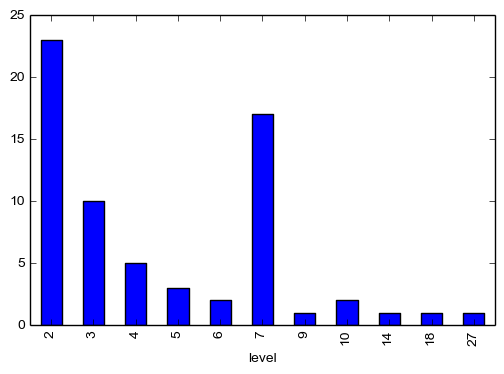

In [15]:
# TODO: Why doesn't this work if I use fr instead of f?
f[iquit & idrac].groupby('level').size().plot.bar();
# AHA! There are draconian colour scummers out there!